In [37]:
import scanpy as sc
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import gdown
import os

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


# Load Fitness (SA609) Data

In [38]:
url = "https://drive.google.com/uc?id=1m_VkD-DBDuGj4MwncNEkm5f114vN6Dwf"
output = 'fitness.h5ad'
if not os.path.exists("fitness.h5ad"):
    gdown.download(url, output, quiet=False)
adata = sc.read("fitness.h5ad")
dataset = GeneVectorDataset(adata)

Loading Expression.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9479931/9479931 [01:28<00:00, 106998.37it/s]


Reindexing Cooc


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19799/19799 [00:01<00:00, 9995.35it/s]


In [32]:
retrain = False
if retrain:
    cmps = GeneVector(dataset,
                      output_file="fitness_X.vec",
                      batch_size=200000,
                      c=100.,
                      emb_dimension=100)
    cmps.train(100,threshold=1e-7)

# Load Embedding

In [33]:
embed = GeneEmbedding("embeddings/fitness_X.vec", dataset,vector="average")
print(embed.compute_similarities("ID1").head(20))

Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 3675989.48it/s]

        Gene  Similarity
0        ID1    1.000000
1        ID2    0.775131
2        ID4    0.753264
3        ID3    0.733372
4   HNRNPUL1    0.694974
5       TCF4    0.684364
6       SKA2    0.670993
7      NR2F2    0.666849
8      ZFHX3    0.655106
9       EGR1    0.642532
10    GAGE2A    0.635907
11     MSMO1    0.631988
12      H1F0    0.628049
13       FOS    0.619324
14     CDK14    0.617904
15     FOXP1    0.610703
16     TXNIP    0.605011
17     STAT3    0.596104
18      IER2    0.593848
19  KCNQ1OT1    0.592504


# Generate Metagenes

In [5]:
gdata = embed.get_adata(resolution=20)
metagenes = embed.get_metagenes(gdata)

computing neighbors


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 207 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


# Load Cell Embedding

In [6]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()

normalizing counts per cell
    finished (0:00:00)
Loading Expression.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19799/19799 [00:32<00:00, 602.71it/s]

computing neighbors


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


In [7]:
ct = []
for x in adata.obs["condition"]:
    if "T" in x:
        ct.append("Treated")
    else:
        ct.append("Untreated")
adata.obs["treatment"] = ct

/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
 

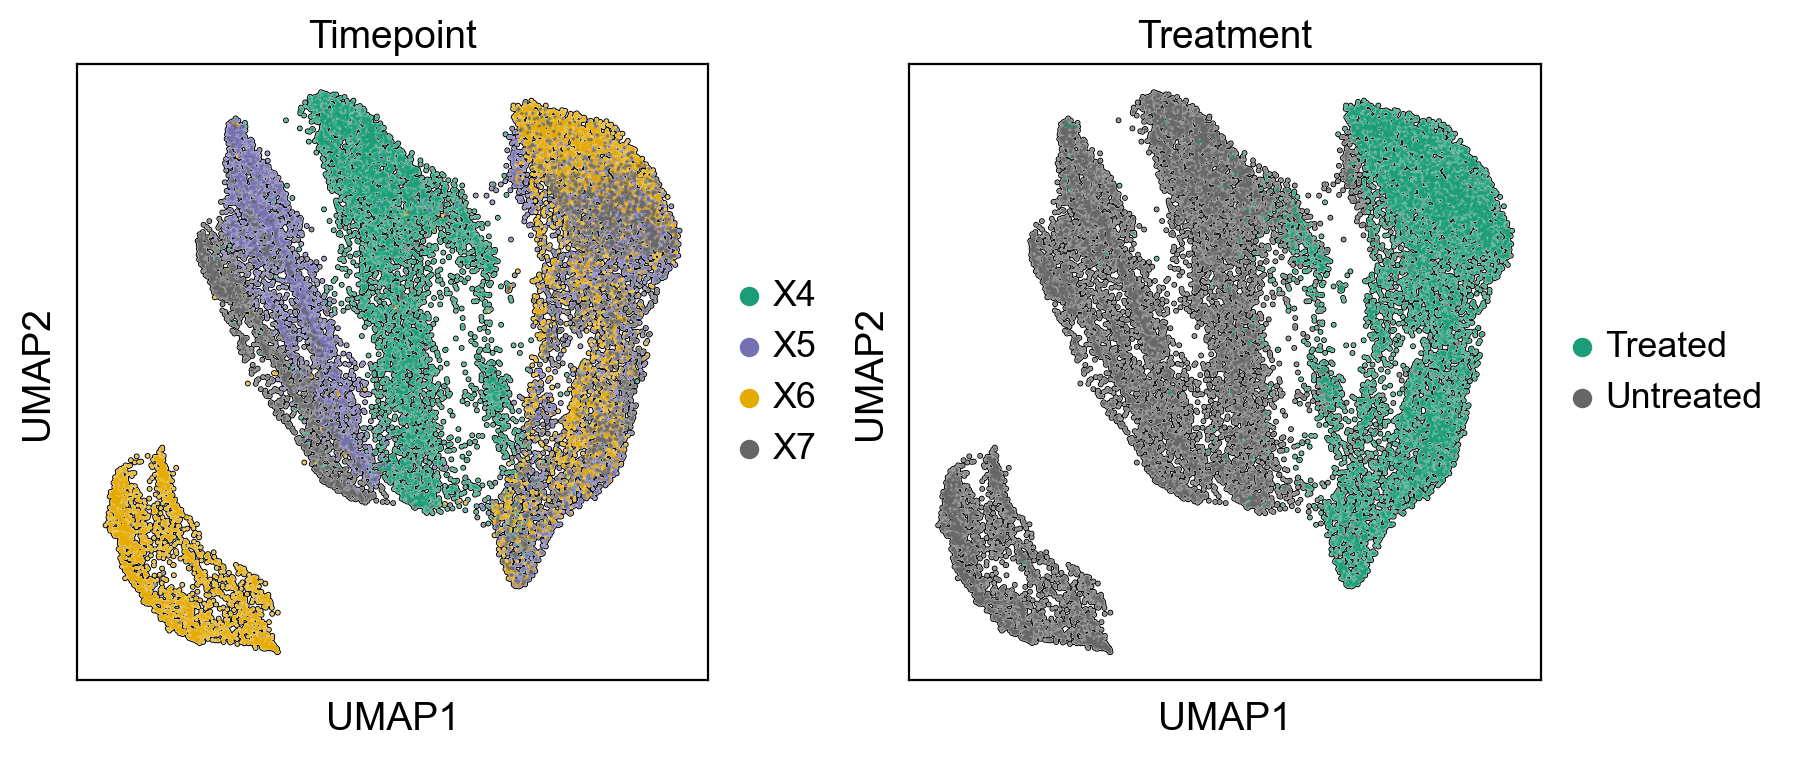

In [8]:
sc.pl.umap(adata, color=["timepoint","treatment"],palette="Dark2",
           wspace=0.2,title=["Timepoint","Treatment"], add_outline=True, save="treatment.pdf")

# Generate Metagenes and Look at Genes Similar to ID1 in Gene Embedding (cosine distance)

In [9]:
gdata = embed.get_adata(resolution=20)
metagenes = embed.get_metagenes(gdata)
for x,y in metagenes.items():
    if "ID1" in y:
        print(y)
    if "STAT3" in y:
        print(y)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 207 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
['ID3', 'ID2', 'EPCAM', 'KDM3A', 'FOXP1', 'HES1', 'ID4', 'PTN', 'BARX1', 'NCAM1', 'KCNMA1', 'ZFHX3', 'TCF4', 'ID1', 'SYCP2', 'SPINT2', 'H1F0']
['TCHH', 'IGFBP2', 'IGFBP5', 'TSPAN13', 'INSIG1', 'MAGEH1', 'SLC38A2', 'MEIS2', 'STAT3']


# Gene Module Scoring

In [28]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
for x in adata.obs.columns:
    if "SCORE" in x:
        del adata.obs[x]
embed.score_metagenes(adata, metagenes)

# Run OLS over Treated Timepoints for Scoring for Each Metagene

In [12]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import tqdm
import numpy
import pandas

t = adata[adata.obs["treatment"]=="Treated"]

t_slope = dict()
t_pvalues = dict()
clusters = []
order = ['UT', 'UTT', 'UTTT', 'UTTTT']
tps = [0,1,2,3]

for cluster, vector in metagenes.items():
    cluster = cluster + "_SCORE"
    values = []
    conditions = []
    ts = []
    for condition,tp in zip(order,tps):
        sub = t[t.obs["condition"]==condition]
        val = sub.obs[cluster].tolist()
        values += val
        ts += [tp for _ in val]
    df = pandas.DataFrame.from_dict({"condition":ts,"expression":values})    
    res = ols("expression ~ C(condition)", data=df).fit()
    t_pvalues[cluster] = res.summary2().tables[1]['P>|t|']["C(condition)[T.1]"]
    t_slope[cluster] = res.params['C(condition)[T.1]']

# Run again over Untreated Timepoints

In [13]:
u = adata[adata.obs["treatment"]=="Untreated"]

u_slope = dict()
u_pvalues = dict()
clusters = []
order = ['UU', 'UUU', 'UUUU', 'UUUUU']
tps = [0,1,2,3]

for cluster, vector in metagenes.items():
    cluster = cluster + "_SCORE"
    values = []
    conditions = []
    ts = []
    for condition,tp in zip(order,tps):
        sub = u[u.obs["condition"]==condition]
        val = sub.obs[cluster].tolist()
        values += val
        ts += [tp for _ in val]
    df = pandas.DataFrame.from_dict({"condition":ts,"expression":values})    
    res = ols("expression ~ C(condition)", data=df).fit()
    u_pvalues[cluster] = res.summary2().tables[1]['P>|t|']["C(condition)[T.1]"]
    u_slope[cluster] = res.params['C(condition)[T.1]']

# Load P-values and Coefficients in Data Frame

In [14]:
u_s = []
t_s = []
u_p = []
t_p = []
mgs = []
classt = []
for cluster in metagenes.keys():
    cluster = cluster + "_SCORE"
    t_s.append(t_slope[cluster])
    u_s.append(u_slope[cluster])
    u_p.append(t_pvalues[cluster])
    t_p.append(t_pvalues[cluster])
    mgs.append(cluster)
df = pandas.DataFrame.from_dict({"Metagene":mgs,
                                 "Untreated Coeff":u_s,
                                 "Treated Coeff":t_s,
                                 "Untreated pval":u_p,
                                 "Treated pval":t_p})
df

,Metagene,Untreated Coeff,Treated Coeff,Untreated pval,Treated pval
0,161_SCORE,-0.002152,0.064831,1.967194e-23,1.967194e-23
1,74_SCORE,-0.011169,0.046582,8.491938e-16,8.491938e-16
2,75_SCORE,-0.003817,0.031009,2.338066e-07,2.338066e-07
3,94_SCORE,-0.007520,0.023307,2.192270e-05,2.192270e-05
4,80_SCORE,-0.077618,-0.051414,9.332378e-14,9.332378e-14
...,...,...,...,...,...
202,204_SCORE,-0.005359,-0.043362,8.260804e-51,8.260804e-51
203,200_SCORE,-0.010367,0.006677,1.817127e-01,1.817127e-01
204,192_SCORE,0.001451,-0.010017,7.814258e-03,7.814258e-03
205,206_SCORE,0.000203,0.000888,3.091043e-01,3.091043e-01


In [15]:
increasing = []
for x,y in zip(df["Untreated Coeff"],df["Treated Coeff"]):
    if x < y and y > 0.1:
        increasing.append("Treatment Specific Metagenes")
    else:
        increasing.append("_Other")
df["label"] = increasing

hit -0.00910558111992673 0.16714718739902232 15
hit 0.012334542980268108 0.1404406177500989 72
hit 0.018177559673716297 0.20443561358155066 89
hit 0.01583092390207241 0.12603231662055353 98
hit 0.03190408473853101 0.17332064931090804 148


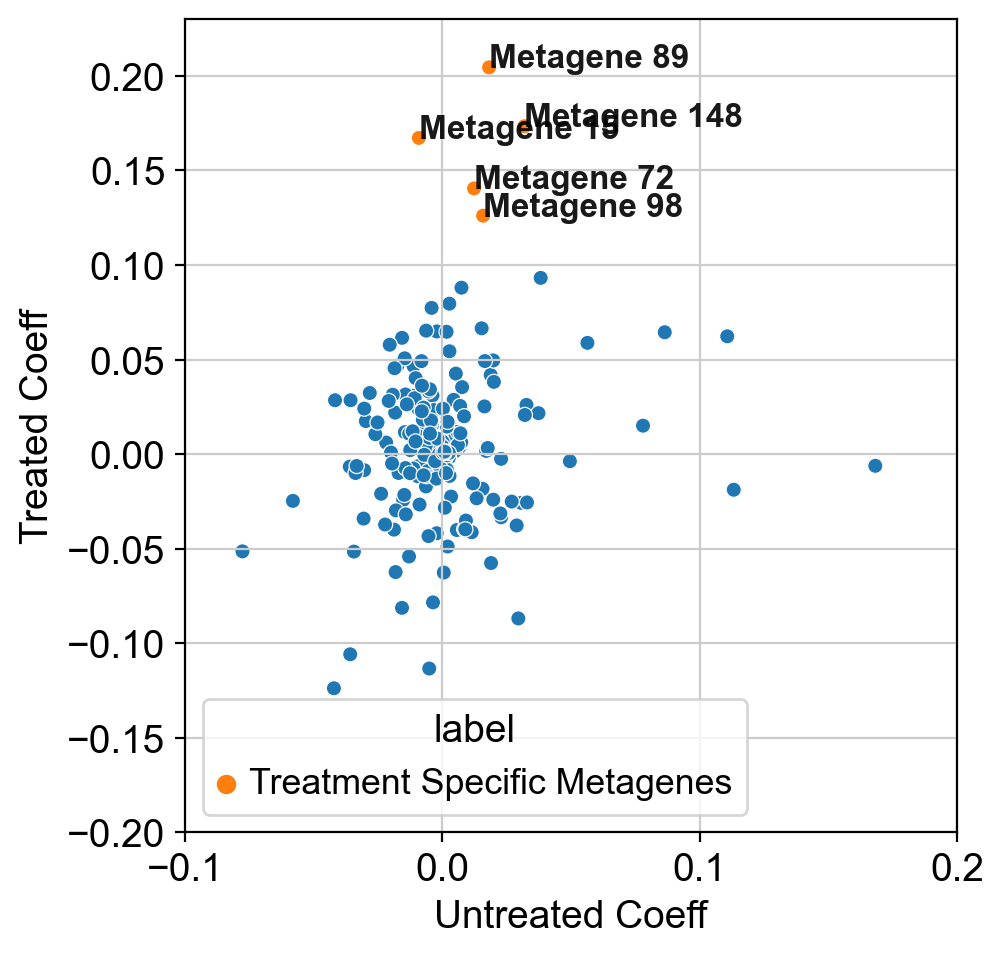

In [17]:
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax = sns.scatterplot(data=df,x="Untreated Coeff",y="Treated Coeff",s=30, hue="label",ax=ax)

for gene, x, y, l in zip(df.index,df["Untreated Coeff"],df["Treated Coeff"],df["label"]):
    if l != "_Other":
        print("hit",x,y, gene)
        ax.text(x, y, "Metagene "+str(gene), fontsize=12, alpha=0.9, fontweight="bold")
plt.tight_layout()


plt.xlim(-0.1,0.2)
plt.ylim(-0.2,0.23)
plt.savefig("/Users/ceglian/mgs_fit.pdf")

# Subset MGs that Increase in Treated with Significant Pvalue (Examine Untreated Coeff)

In [18]:
dfx = df[df["Treated pval"] < 0.001]
dfx = dfx[dfx["Treated Coeff"] > 0.1]
dfx = dfx[dfx["Untreated Coeff"] < dfx["Treated Coeff"]]
dfx = dfx.sort_values("Treated Coeff",ascending=False)
dfx

,Metagene,Untreated Coeff,Treated Coeff,Untreated pval,Treated pval,label
89,179_SCORE,0.018178,0.204436,4.406329e-251,4.406329e-251,Treatment Specific Metagenes
148,59_SCORE,0.031904,0.173321,4.112171e-208,4.112171e-208,Treatment Specific Metagenes
15,24_SCORE,-0.009106,0.167147,2.813565e-202,2.813565e-202,Treatment Specific Metagenes
72,135_SCORE,0.012335,0.140441,4.694332e-144,4.694332e-144,Treatment Specific Metagenes
98,188_SCORE,0.015831,0.126032,9.127745e-82,9.127745e-82,Treatment Specific Metagenes


# Look at only top 5 most increasing - Run GSEA with Hallmark Geneset

In [19]:
import gseapy as gp
import collections
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg in dfx["Metagene"]:
    if len( metagenes[mg.replace("_SCORE","")]) == 0: continue
    print(mg, metagenes[mg.replace("_SCORE","")])
    enr = gp.enrichr(gene_list=metagenes[mg.replace("_SCORE","")],
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        enrc[mg][x] = y
        terms.add(x)

179_SCORE ['CRABP2', 'KIF1A', 'GAGE13', 'CIB1']


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-01-12 20:50:29,672 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


59_SCORE ['SPATS2L', 'TNIK', 'CPE', 'HSPA1A', 'TCAF1', 'VCX3A', 'VCX', 'FDFT1', 'SQLE', 'MYC', 'ZNF503', 'FOSB']


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-01-12 20:50:31,150 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


24_SCORE ['ID3', 'ID2', 'EPCAM', 'KDM3A', 'FOXP1', 'HES1', 'ID4', 'PTN', 'BARX1', 'NCAM1', 'KCNMA1', 'ZFHX3', 'TCF4', 'ID1', 'SYCP2', 'SPINT2', 'H1F0']


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


135_SCORE ['TXNIP', 'MSMO1', 'HMGCS1', 'TUBB2A', 'ARF5', 'GAGE2A', 'KCNQ1OT1']


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-01-12 20:50:34,394 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


188_SCORE ['DNM3', 'LINC01118', 'BOC']


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-01-12 20:50:35,861 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


In [20]:
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)

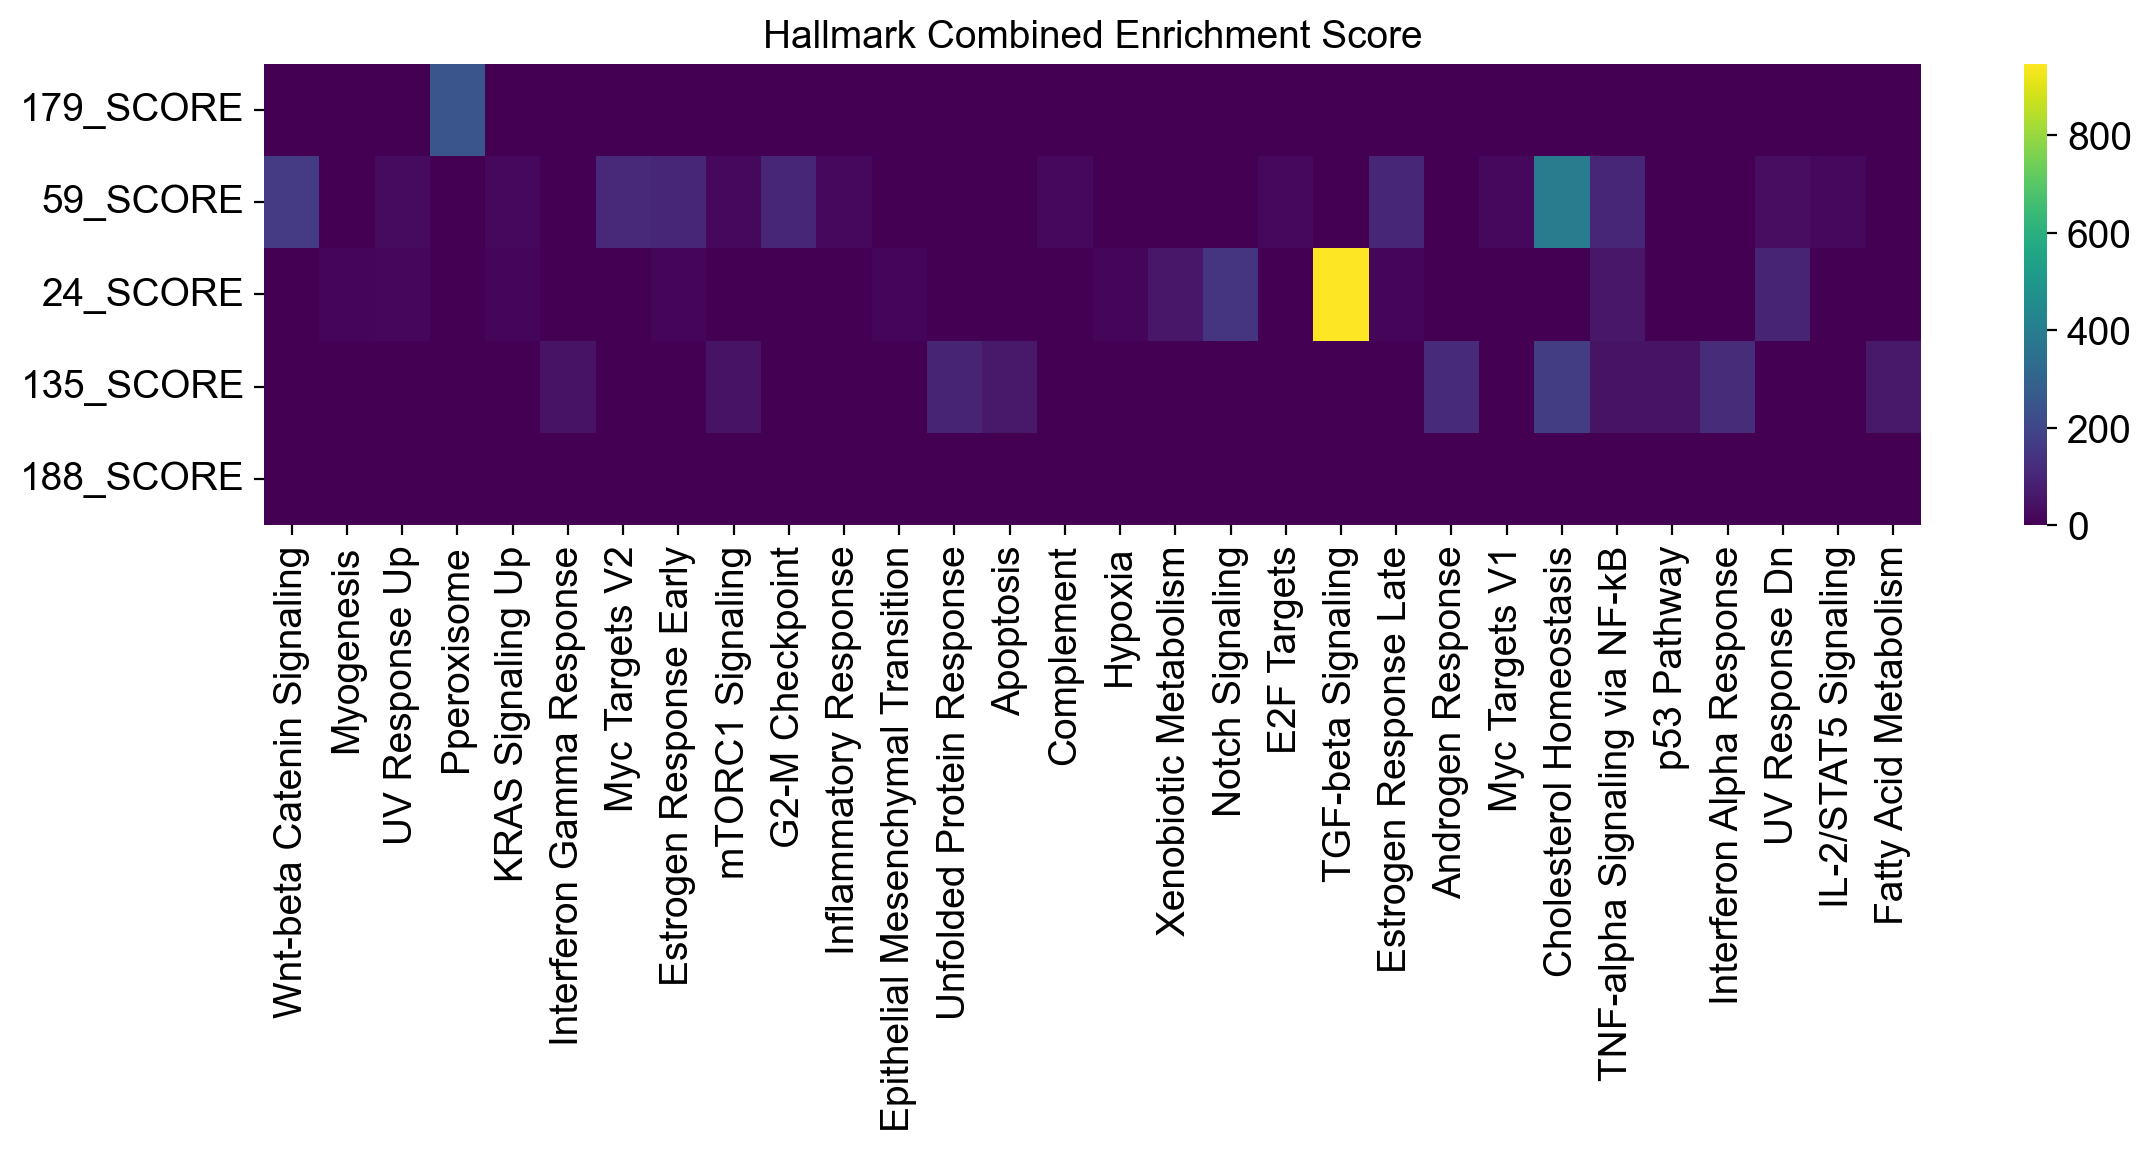

In [21]:
import seaborn as sns
df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()
plt.savefig("/Users/ceglian/treated.pdf")

# Most interesting Metagene 141

In [22]:
mgs_i = dict()
for mg in mgs:
    mg = mg.split("_")[0]
    mgs_i[mg] = metagenes[mg]

... storing 'treatment' as categorical
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


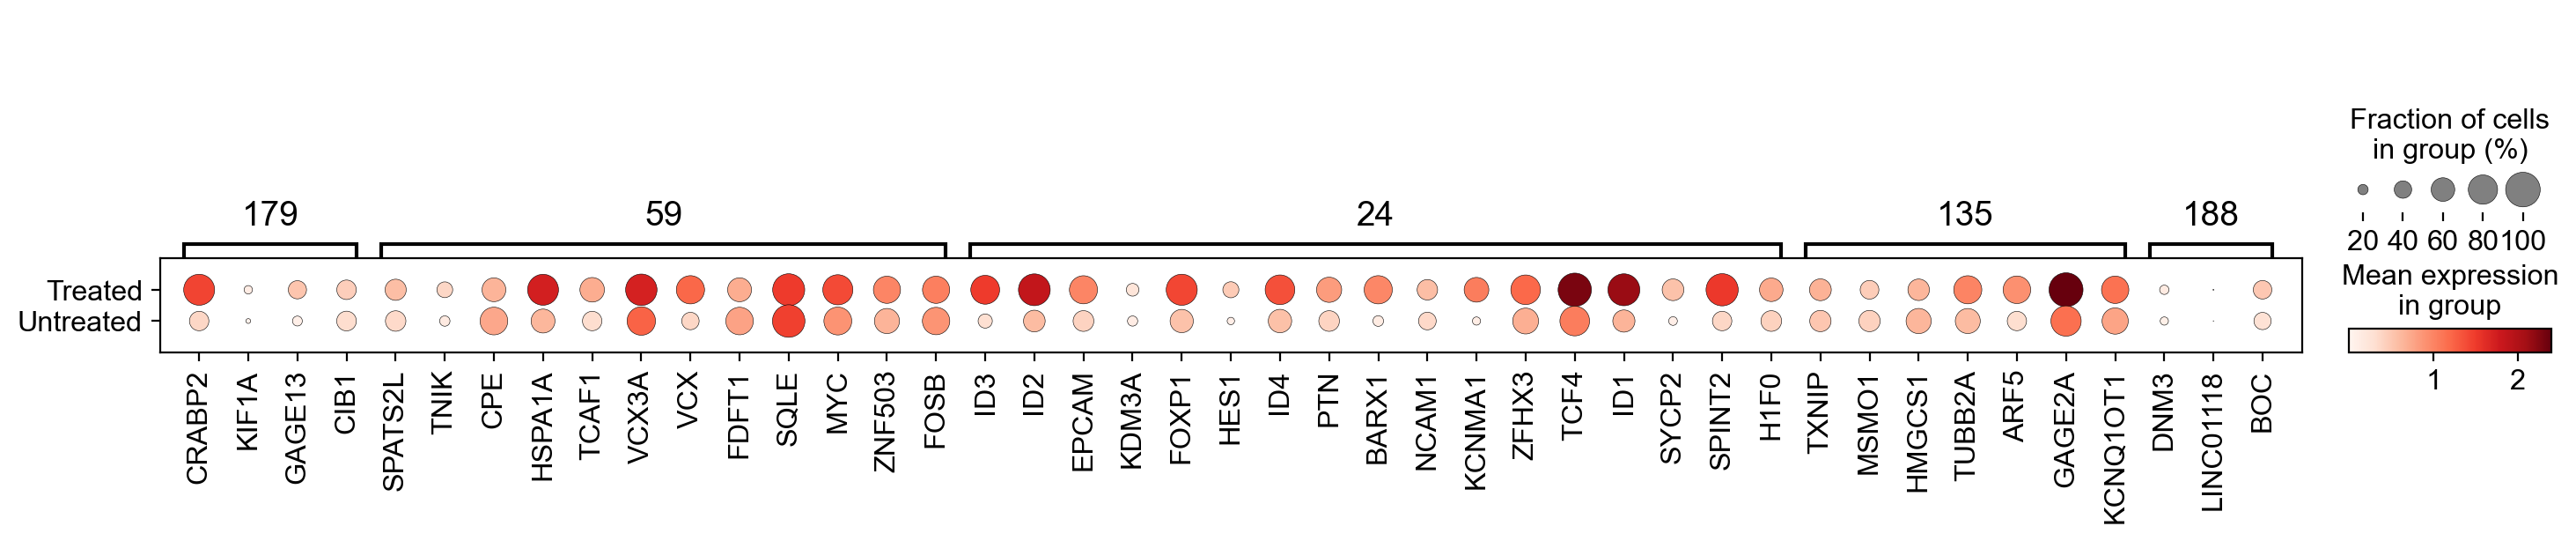

In [24]:
sc.pl.dotplot(adata,mgs_i,groupby="treatment")

In [25]:
tps = []
for x,y in zip(adata.obs["treatment"],adata.obs["timepoint"]):
    tps.append("{}_{}".format(x,y))
adata.obs["timepoint_treatment"] = tps

... storing 'timepoint_treatment' as categorical


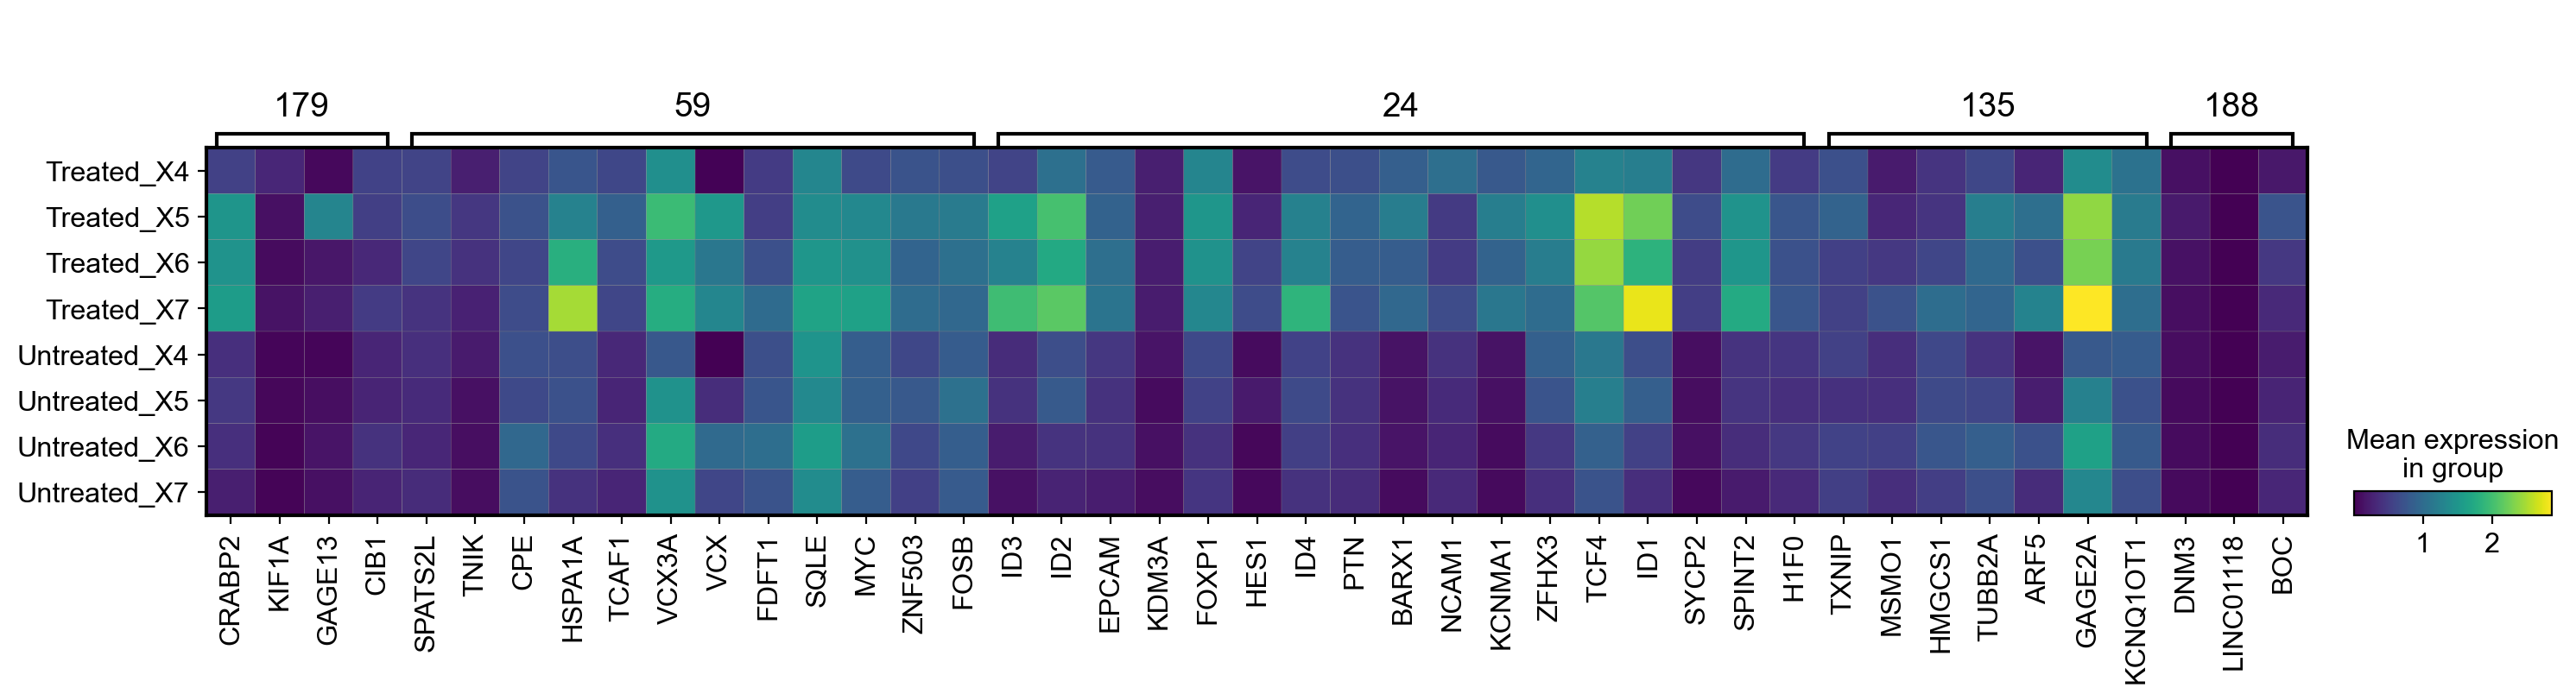

In [26]:
sc.pl.matrixplot(adata,mgs_i,groupby="timepoint_treatment",save="incr.pdf")

Untreated
Treated


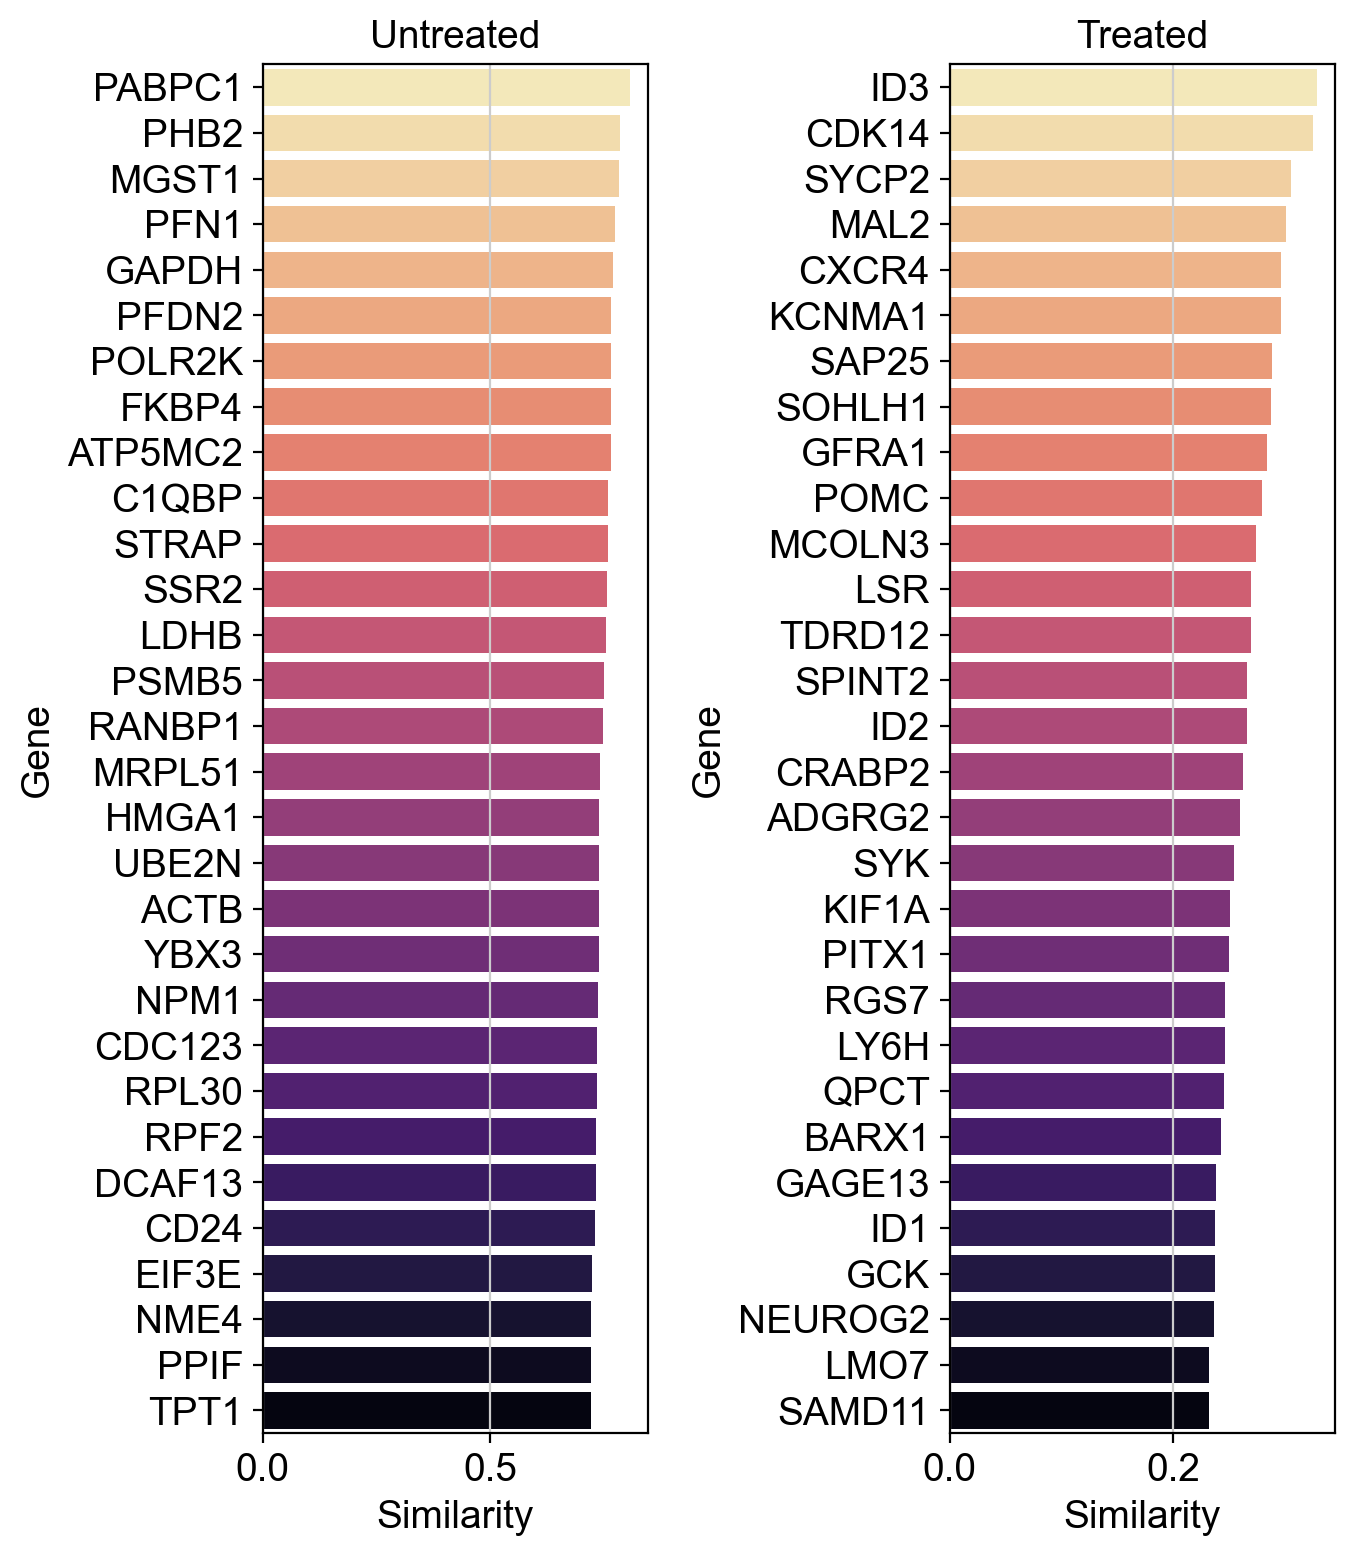

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
comps = collections.defaultdict(list)
for bc,x in zip(adata.obs.index,adata.obs["treatment"]):
    comps[x].append(mapped_components[bc])
vectors = dict()
mean_vecs = []
for x, vec in comps.items():
    print(x)
    ovecs = []
    vec = numpy.mean(vec,axis=0)
    for oph, ovec in comps.items():
        for o in ovec:
            ovecs.append(o)
    aovec = numpy.average(ovecs,axis=0)
    vector = numpy.subtract(vec,aovec)
    vector = numpy.subtract(vector,cembed.dataset_vector)
    vectors[x] = vector
markers = dict()
fig,ax = plt.subplots(1,2,figsize=(7,8))
i = 0
for x, mvec in vectors.items():
    ct_sig = embed.get_similar_genes(mvec)[:30]
    sns.barplot(data=ct_sig,y="Gene",x="Similarity",palette="magma_r",ax=ax[i])
    ax[i].set_title(x)
    i += 1
fig.tight_layout()
plt.savefig("/Users/ceglian/treat.pdf")